In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 20 files belonging to 5 classes.
Predictions:
 [[1.38196435e-06 1.38579298e-06 5.65072833e-06 6.13831653e-05
  9.99930143e-01]
 [9.20520833e-05 3.62299336e-03 6.50429865e-04 9.29347807e-05
  9.95541632e-01]
 [1.69541731e-01 2.91484362e-03 7.55808875e-02 3.59850540e-03
  7.48363972e-01]
 [3.90950637e-03 5.10404408e-01 8.64239060e-04 4.20217037e-01
  6.46048188e-02]
 [3.52019787e-01 3.15366453e-03 1.58991883e-04 3.01630446e-03
  6.41651213e-01]
 [2.58908179e-02 1.56467870e-01 1.06655061e-04 8.17185998e-01
  3.48642527e-04]
 [1.69359833e-01 4.16516401e-02 8.51688092e-05 7.57550478e-01
  3.13529149e-02]
 [1.39603820e-02 9.33505177e-01 4.84663770e-02 8.73174053e-04
  3.19491257e-03]
 [2.29120106e-02 8.06197107e-01 1.24741746e-02 9.97029543e-02
  5.87138161e-02]
 [1.64787273e-03 2.32050970e-01 7.15834737e-01 1.53114961e-03
  4.89352681e-02]
 [5.67327440e-02 9.18138802e-01 4.74943593e-03 1.51934912e-02
  5.18557709e-03]
 [1.40708033e-03 2.67846836e-03 9.24711567e-05 9.94066238e-01
  1.7

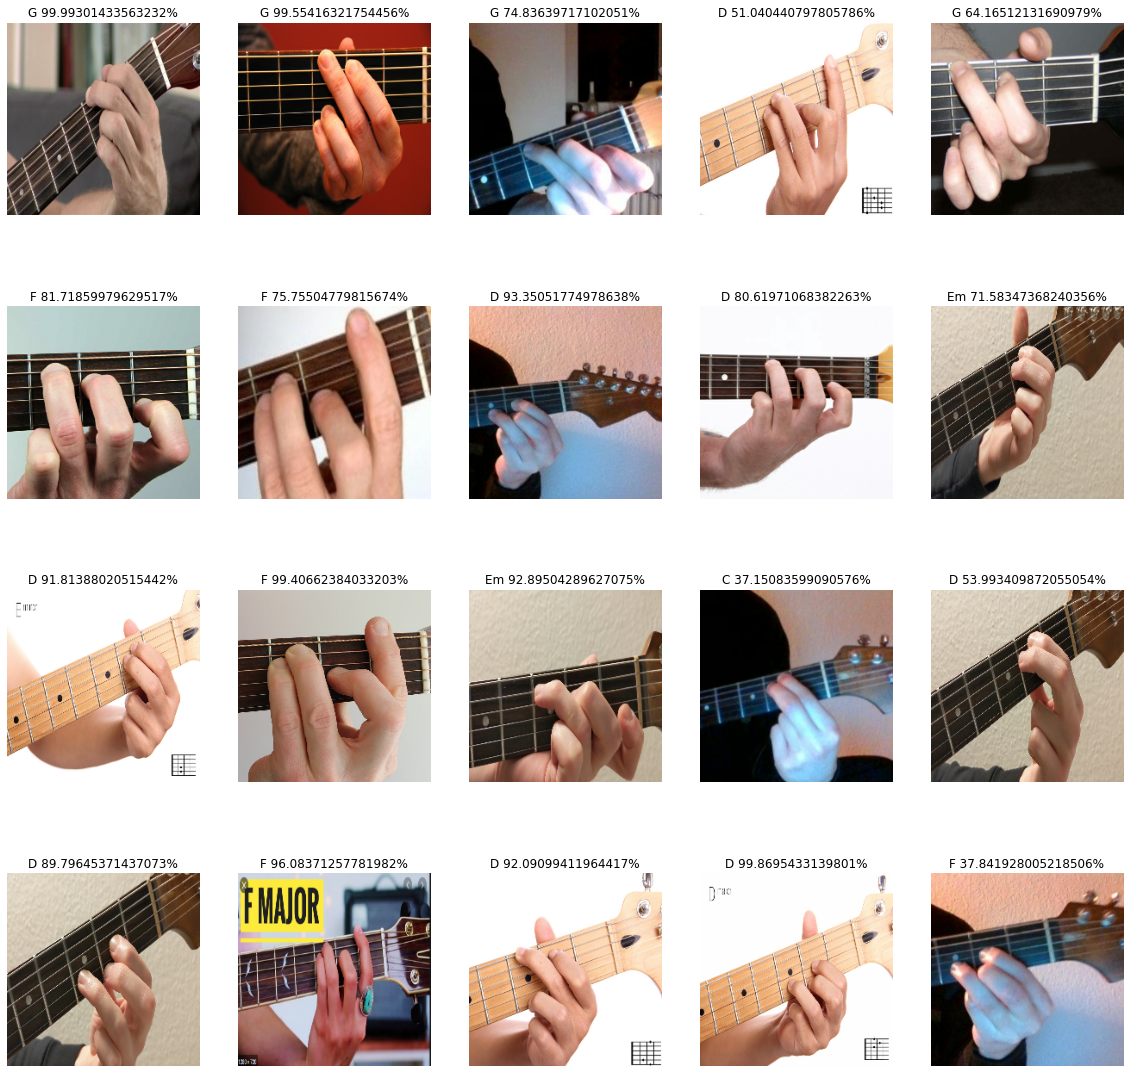

In [2]:
import cv2
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image
from keras.applications import imagenet_utils

CATEGORIES = ["C","D","Em", "F", "G"]
#CATEGORIES = ["0","1","2", "3", "4", "5", "6", "7", "8", "9"]

ROOT = "/content/drive/MyDrive/EML"

model = tf.keras.models.load_model(os.path.join(ROOT, "Guitar_Model_V4"))
# model.summary()


# DIR = '/content/drive/MyDrive/EML/Guitar_Chord_Data_Set/C_augmented'
# print(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

def prepare(filepath):
  img = image.load_img(filepath, target_size=(224, 224))
  return preprocess_input(image.img_to_array(img))


# def prepare(filepath):
#   img = image.load_img(filepath, target_size=(224, 224), color_mode='grayscale')
#   rgb_array = image.img_to_array(img)
#   rgb_array = np.repeat(rgb_array, 3, -1)
#   rgb_array = np.expand_dims(rgb_array, axis=0)
#   return preprocess_input(rgb_array)

def make_prediction(image_name, expected_str):
  prediction = model.predict(prepare(os.path.join(ROOT, image_name)))
  # print(prediction)
  pred = np.argmax(prediction, axis=-1)
  print(CATEGORIES[pred[0]], "with confidence of " + str(prediction[0][pred[0]]*100) + str("%"), "expected ", expected_str)
  # print(CATEGORIES[pred])

#make_prediction("Test_Images/Sign_Language/example_0.JPG")
#make_prediction("Test_Images/Sign_Language/example_1.JPG")
#make_prediction("Test_Images/Sign_Language/example_2.JPG")
#make_prediction("Test_Images/Sign_Language/example_3.JPG")
#make_prediction("Test_Images/Sign_Language/example_4.JPG")
#make_prediction("Test_Images/Sign_Language/example_5.JPG")
#make_prediction("Test_Images/Sign_Language/example_6.JPG")
#make_prediction("Test_Images/Sign_Language/example_7.JPG")
#make_prediction("Test_Images/Sign_Language/example_8.JPG")
#make_prediction("Test_Images/Sign_Language/example_9.JPG")

# make_prediction("Test_Images/Guitar_Chord/C/C0.jpg", "C")
# make_prediction("Test_Images/Guitar_Chord/C/C1.jpg", "C")
# make_prediction("Test_Images/Guitar_Chord/C/C2.jpg", "C")
# make_prediction("Test_Images/Guitar_Chord/C/C3.jpg", "C")
# make_prediction("Test_Images/c_major_cut.jpeg", "C")
# print('')
# make_prediction("Test_Images/Guitar_Chord/D/D0.jpg", "D")
# make_prediction("Test_Images/Guitar_Chord/D/D1.jpg", "D")
# make_prediction("Test_Images/Guitar_Chord/D/D3.jpg", "D")
# make_prediction("Test_Images/d_major_cut.jpeg", "D")
# print('')
# make_prediction("Test_Images/Guitar_Chord/Em/E0.jpg", "Em")
# make_prediction("Test_Images/Guitar_Chord/Em/E1.jpg", "Em")
# make_prediction("Test_Images/e_minor_cut.jpeg", "Em")

#Retrieve a batch of images from the test set

test_dataset = image_dataset_from_directory("/content/drive/MyDrive/EML/Test_Images/Guitar_Chord",
                                             shuffle=True,
                                             batch_size=32,
                                             image_size=(224,224))

image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

print('Predictions:\n', predictions)
print('Labels:\n', label_batch)

predictedLabels = np.empty(20, dtype=np.int)

plt.figure(figsize=(20,20))
for i in range(20):
  ax = plt.subplot(4, 5, i + 1)
  plt.imshow(image_batch[i]/255)
  pred = np.argmax(predictions[i], axis=-1)
  predictedLabels[i] = pred
  plt.title(CATEGORIES[pred] + " " + str(predictions[i][pred]*100)+ "%")
  plt.axis("off")

Confusion matrix, without normalization
[[0 1 1 1 1]
 [0 3 0 1 0]
 [1 2 1 0 0]
 [0 1 0 3 0]
 [0 1 0 0 3]]


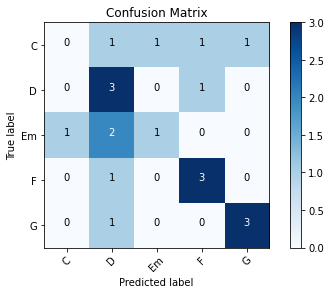

In [3]:
from sklearn.metrics import confusion_matrix
import itertools

predictions = np.array([])
labels =  np.array([])
for x, y in test_dataset:
  predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis=-1)])
  labels = np.concatenate([labels, y.numpy()]).astype(int)


def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_true=labels, y_pred=predictions)
plot_confusion_matrix(cm=cm, classes=CATEGORIES, title='Confusion Matrix')